<a href="https://colab.research.google.com/github/beyondsinha/Respiratory_Risk_Classification/blob/main/Respiratory_Diseases_Risk_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the libraries

In [ ]:

!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

Importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Loading the dataset

In [ ]:

file_path = '/content/air_quality_health_impact_data.csv'
df = pd.read_csv(file_path)

Overview of Data

In [ ]:
# first 5 rows
print("Dataset Head:")
display(df.head())

Dataset Head:


,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621727,1.543378,46.851415,4.521422,10,2,0,100.000000,0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0


In [ ]:
#Basic infoprint(" Data Info:")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   int64  
dtypes: float64(10), int64(5)
memory usage:

In [ ]:
print("Summary Statistics:")
display(df.describe())


Summary Statistics:


,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936811,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


Checking for missing values :

In [ ]:

print("Missing Values:")
print(df.isnull().sum())

Missing Values:
RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64


Univariate Analysis

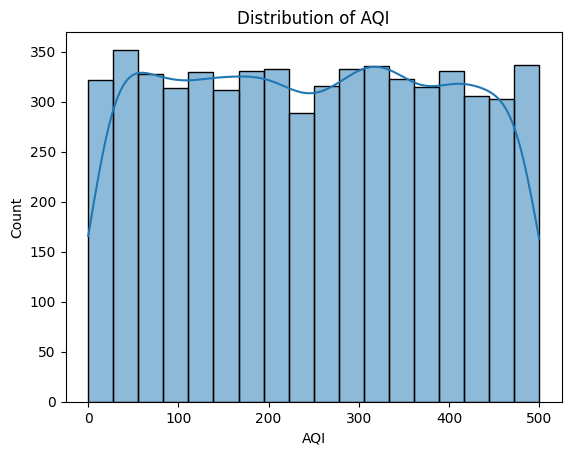

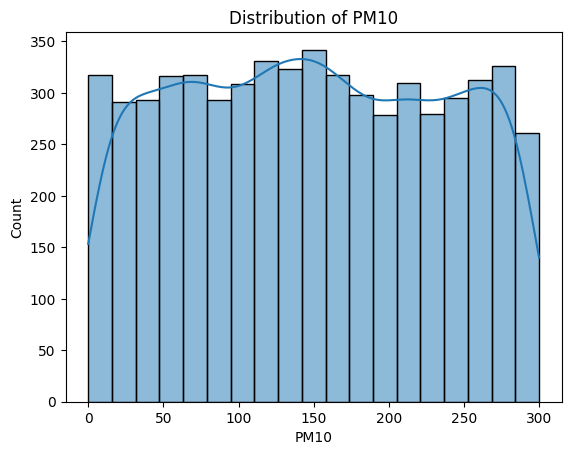

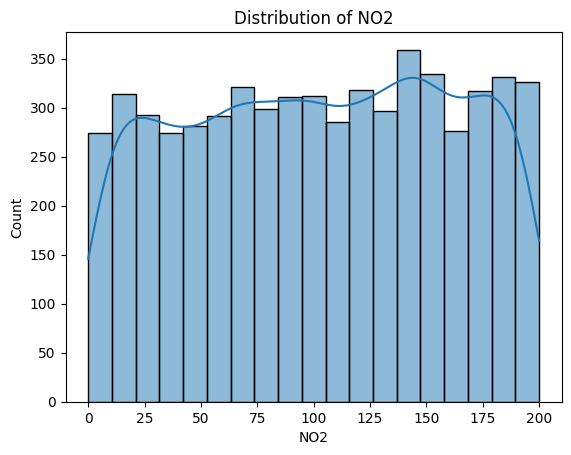

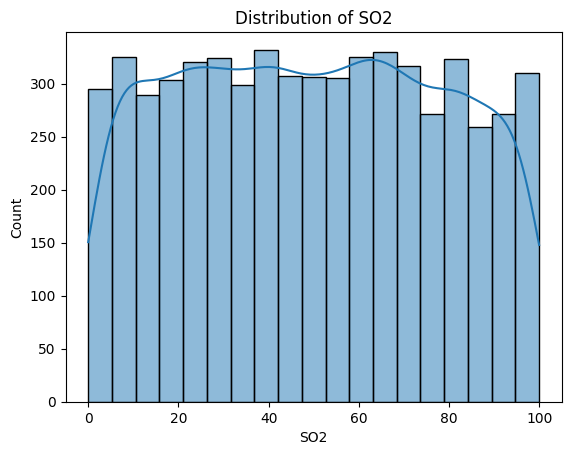

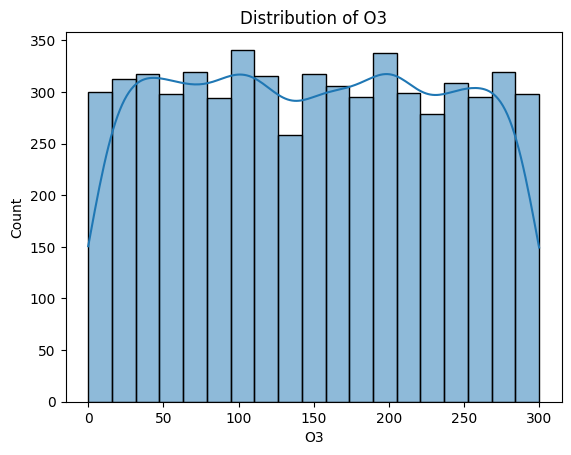

In [ ]:
for col in ['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']:
    if col in df.columns:
        plt.figure()
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


Boxplots for Outlier Detection

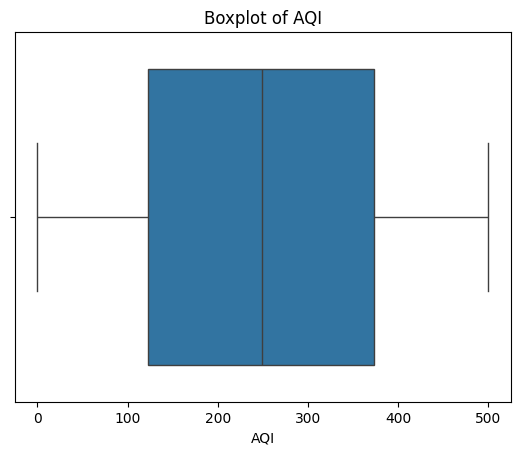

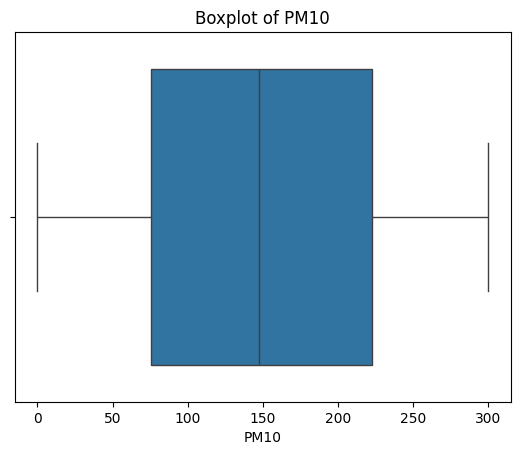

In [ ]:
for col in ['AQI', 'PM2.5', 'PM10']:
    if col in df.columns:
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()


Correlation Matrix

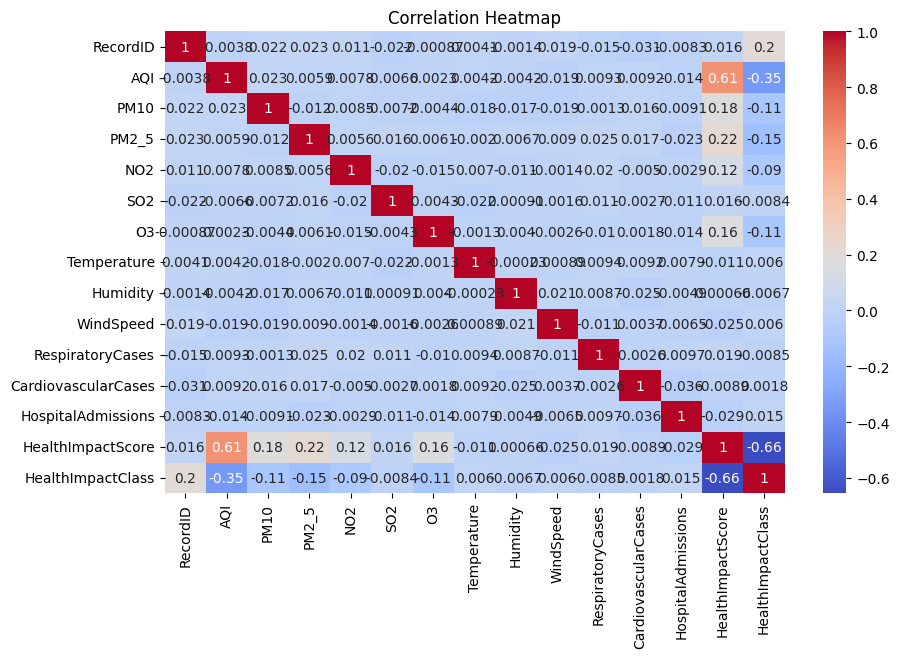

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Boxplots by Class

Model Building & Training

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier


In [ ]:
# Load the CSV
df = pd.read_csv('/content/air_quality_health_impact_data.csv')

# Features and target, splitting into X & Y
X = df.drop('HealthImpactClass', axis=1)
Y = df['HealthImpactClass']


In [ ]:
print(X)
print(Y)

      RecordID         AQI        PM10       PM2_5         NO2        SO2  \
0            1  187.270059  295.853039   13.038560    6.639263  66.161150   
1            2  475.357153  246.254703    9.984497   16.318326  90.499523   
2            3  365.996971   84.443191   23.111340   96.317811  17.875850   
3            4  299.329242   21.020609   14.273403   81.234403  48.323616   
4            5   78.009320   16.987667  152.111623  121.235461  90.866167   
...        ...         ...         ...         ...         ...        ...   
5806      5807  171.112762   11.246387  197.984629  158.643107  17.743678   
5807      5808  490.691667  275.340762   55.774170  132.336871  29.334724   
5808      5809  314.841798   41.892699  184.708551   82.105823  68.334578   
5809      5810  208.080473  165.533785  199.177255  100.796385  87.586488   
5810      5811   83.269257   82.216262  119.968244  193.440691  79.849177   

              O3  Temperature   Humidity  WindSpeed  RespiratoryCases  \
0 

Traing & Testing Data Splitting

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)


Shape of Training & Testing Data

In [ ]:
# Print shape of training and testing data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train: (4648, 13)
Shape of X_test : (1163, 13)
Shape of Y_train: (4648,)
Shape of Y_test : (1163,)


Standardizing the features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


XGBoost Classifier

In [ ]:
model = XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train_scaled, Y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:47:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

Evaluating the model

In [ ]:
Y_pred = model.predict(X_test_scaled)

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


[[960   1   1   0   0]
 [  9 107   0   0   0]
 [ 10   0  44   1   0]
 [  8   1   1   9   0]
 [  9   1   1   0   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       962
           1       0.97      0.92      0.95       116
           2       0.94      0.80      0.86        55
           3       0.90      0.47      0.62        19
           4       0.00      0.00      0.00        11

    accuracy                           0.96      1163
   macro avg       0.75      0.64      0.68      1163
weighted avg       0.95      0.96      0.96      1163



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Applying SMOTE


In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

# Applying SMOTE on training data
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Scaling the data (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


Training the XGBoost again

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    eval_metric='mlogloss',
    use_label_encoder=False
)

model.fit(X_train_scaled, Y_train_resampled)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

Evaluating again

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(X_test_scaled)

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


[[916   3   7  16  20]
 [  8 105   2   0   1]
 [  8   0  46   0   1]
 [  6   1   1   9   2]
 [  8   2   1   0   0]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       962
           1       0.95      0.91      0.93       116
           2       0.81      0.84      0.82        55
           3       0.36      0.47      0.41        19
           4       0.00      0.00      0.00        11

    accuracy                           0.93      1163
   macro avg       0.62      0.63      0.62      1163
weighted avg       0.94      0.93      0.93      1163



LightGBM Classifier

In [ ]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Splitting & Scaling the Data

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Applying SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train_scaled, Y_train)

Model Training

In [ ]:
model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=5,
    boosting_type='gbdt',
    metric='multi_logloss',
    random_state=42,
    n_estimators=100)

In [ ]:
model.fit(X_train_balanced, Y_train_balanced)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 19230, number of used features: 13
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


LGBMClassifier(metric='multi_logloss', num_class=5, objective='multiclass',
               random_state=42)

Prediction & Evaluation

In [ ]:
Y_pred = model.predict(X_test_scaled)

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[957   1   1   1   2]
 [ 11 100   4   0   1]
 [ 11   0  44   0   0]
 [  7   2   0  10   0]
 [ 10   0   1   0   0]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       962
           1       0.97      0.86      0.91       116
           2       0.88      0.80      0.84        55
           3       0.91      0.53      0.67        19
           4       0.00      0.00      0.00        11

    accuracy                           0.96      1163
   macro avg       0.74      0.64      0.68      1163
weighted avg       0.95      0.96      0.95      1163



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


70:30 Split

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from xgboost import XGBClassifier


In [ ]:
file_path = '/content/air_quality_health_impact_data.csv'
df = pd.read_csv(file_path)

In [ ]:
# Load the CSV
df = pd.read_csv('/content/air_quality_health_impact_data.csv')

# Features and target, splitting into X & Y
X = df.drop('HealthImpactClass', axis=1)
Y = df['HealthImpactClass']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, stratify=Y, random_state=2
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train_scaled, Y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:16:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [ ]:
Y_pred = model.predict(X_test_scaled)

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1426    5    5    5    2]
 [   4  157    5    4    4]
 [   3    4   69    3    3]
 [   4    0    3   16    5]
 [   6    6    2    2    1]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1443
           1       0.91      0.90      0.91       174
           2       0.82      0.84      0.83        82
           3       0.53      0.57      0.55        28
           4       0.07      0.06      0.06        17

    accuracy                           0.96      1744
   macro avg       0.66      0.67      0.67      1744
weighted avg       0.96      0.96      0.96      1744



Reducing classes from 5 to 3

In [ ]:
def reduce_classes(y):
    if y in [0, 1]:
        return 0  # Low Risk
    elif y == 2:
        return 1  # Moderate Risk
    else:
        return 2  # High Risk


In [ ]:
Y_reduced = Y.apply(reduce_classes)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y_reduced, test_size=0.3, random_state=2, stratify=Y_reduced
)


In [ ]:
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_bal, Y_train_bal = smote.fit_resample(X_train_scaled, Y_train)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train_bal, Y_train_bal)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:16:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred, target_names=["Low Risk", "Moderate Risk", "High Risk"]))


Confusion Matrix:
[[1592   10   15]
 [   1   66   15]
 [  12    4   29]]

Classification Report:
               precision    recall  f1-score   support

     Low Risk       0.99      0.98      0.99      1617
Moderate Risk       0.82      0.80      0.81        82
    High Risk       0.49      0.64      0.56        45

     accuracy                           0.97      1744
    macro avg       0.77      0.81      0.79      1744
 weighted avg       0.97      0.97      0.97      1744



Manual Data Augmentation + Merging Classes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib


# Loading the dataset :

df = pd.read_csv("air_quality_health_impact_data.csv")


# Merging the classes :

def merge_classes(x):
    if x == 0:
        return 0  # Low Risk
    elif x in [1, 2]:
        return 1  # Moderate Risk
    else:
        return 2  # High Risk

df['HealthImpactClass'] = df['HealthImpactClass'].apply(merge_classes)


# Manual Augmentation for Class 2 :

class2_df = df[df['HealthImpactClass'] == 2].copy()
num_augmented = 2  # number of augmentation iterations

augmented_data = []
for _ in range(num_augmented):
    noisy = class2_df.copy()
    for col in noisy.columns[:-1]:  # avoid target column
        noisy[col] += np.random.normal(0, 0.2, size=noisy.shape[0])
    augmented_data.append(noisy)

df_augmented = pd.concat([df] + augmented_data, ignore_index=True)

print(" After Augmentation Class Distribution:\n", df_augmented['HealthImpactClass'].value_counts())


# Separating the features and target rows :

X = df_augmented.drop('HealthImpactClass', axis=1)
y = df_augmented['HealthImpactClass']
feature_columns = X.columns.tolist()  # save the exact column order


# Train-test split (70:30) :

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Scaling the data :

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training our XGBoost :

model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


# Evaluating the model :

y_pred = model.predict(X_test_scaled)
print(" Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# Saving the model, scaler, and feature columns in separate joblib files :

joblib.dump(model, 'xgb_model_3class_augmented.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(feature_columns, 'feature_columns.joblib')





 After Augmentation Class Distribution:
 HealthImpactClass
0    4808
1     852
2     453
Name: count, dtype: int64
 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1442
           1       0.93      0.89      0.91       256
           2       0.80      0.90      0.85       136

    accuracy                           0.97      1834
   macro avg       0.91      0.93      0.92      1834
weighted avg       0.97      0.97      0.97      1834

 Confusion Matrix:
 [[1431    5    6]
 [   5  227   24]
 [   3   11  122]]


['feature_columns.joblib']

Running a real-time prediction pipeline

In [ ]:
import joblib
import numpy as np

# Load the model components
model = joblib.load('xgb_model_3class_augmented.joblib')
scaler = joblib.load('scaler.joblib')
feature_columns = joblib.load('feature_columns.joblib')

# ⚠️ Replace this dictionary with real-time values or user input
input_data_dict = {
    'RecordID' : 1000,
    'AQI': 180,
    'PM2_5': 85,
    'PM10': 120,
    'NO2': 40,
    'SO2': 12,
    'O3': 50,
    'Temperature': 34,
    'Humidity': 60,
    'WindSpeed': 1.8,
    'Pressure': 1008,
    'RespiratoryCases': 6,
    'CardiovascularCases': 22,
    'HospitalAdmissions': 14,
    'HealthImpactScore': 92

}

# Create input vector in the correct order
input_vector = [input_data_dict[feature] for feature in feature_columns]

# Scale and Predict
input_scaled = scaler.transform([input_vector])
prediction = model.predict(input_scaled)[0]


# Decode prediction
label_map = {0: 'Low Risk', 1: 'Moderate Risk', 2: 'High Risk'}
print("🩺 Predicted Respiratory Risk:", label_map[prediction])


🩺 Predicted Respiratory Risk: Low Risk


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving to Streamlit

In [ ]:
joblib.dump(model, "xgb_model_3class_augmented.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

Connecting to API + Creating a Streamlit Dashboard

In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
code = '''
import streamlit as st
import requests
import joblib
import numpy as np

model = joblib.load('xgb_model_3class_augmented.joblib')
scaler = joblib.load('scaler.joblib')


# AQICN API Settings

API_TOKEN = "92da17f806b125ec50689e227cb07c0af400961c"

city_map = {
    "Delhi": "delhi",
    "Mumbai": "mumbai",
    "Kolkata": "kolkata",
    "Chennai": "chennai",
    "Bengaluru": "bangalore",
    "Hyderabad": "hyderabad",
    "Ahmedabad": "ahmedabad",
    "Lucknow": "lucknow",
    "Jaipur": "jaipur",
    "Patna": "patna"
}

def fetch_air_quality(city):
    url = f"https://api.waqi.info/feed/{city_map[city]}/?token={API_TOKEN}"
    try:
        response = requests.get(url)
        data = response.json()
        if data["status"] == "ok":
            aqi = data["data"]["aqi"]
            pm25 = data["data"]["iaqi"].get("pm25", {}).get("v", 0)
            pm10 = data["data"]["iaqi"].get("pm10", {}).get("v", 0)
            return aqi, pm10, pm25
        else:
            return None, None, None
    except:
        return None, None, None

def get_risk_label(pred):
    mapping = {
        0: ("Low Risk", "🟢 You are at low risk."),
        1: ("Moderate Risk", "🟠 You are at moderate risk."),
        2: ("High Risk", "🔴 You are at high risk. Limit outdoor exposure!")
    }
    return mapping.get(pred, ("Unknown", "Prediction could not be made."))


# Define AQI-based dummy feature sets

low_risk_dummy = {
    "RecordID": 1001,
    "NO2": 10.0,
    "SO2": 5.0,
    "O3": 20.0,
    "Temperature": 22.0,
    "Humidity": 55.0,
    "WindSpeed": 3.5,
    "RespiratoryCases": 50,
    "CardiovascularCases": 40,
    "HospitalAdmissions": 30,
    "HealthImpactScore": 45.0
}

moderate_risk_dummy = {
    "RecordID": 1002,
    "NO2": 35.0,
    "SO2": 12.0,
    "O3": 40.0,
    "Temperature": 30.0,
    "Humidity": 60.0,
    "WindSpeed": 2.5,
    "RespiratoryCases": 200,
    "CardiovascularCases": 150,
    "HospitalAdmissions": 180,
    "HealthImpactScore": 75.0
}

high_risk_dummy = {
    "RecordID": 1050,
    "NO2": 90.0,
    "SO2": 50.0,
    "O3": 100.0,
    "Temperature": 38.0,
    "Humidity": 30.0,
    "WindSpeed": 0.8,
    "RespiratoryCases": 500,
    "CardiovascularCases": 450,
    "HospitalAdmissions": 600,
    "HealthImpactScore": 98.0
}


# Streamlit UI

st.set_page_config(page_title="Respiratory Risk Predictor", layout="centered")
st.title("🌫️ Respiratory Risk Predictor Based on AQI")
st.write("Get real-time predictions of respiratory disease risk from air quality.")

city = st.selectbox("Select a City", list(city_map.keys()))

if st.button("Predict Risk"):
    with st.spinner("Fetching data and predicting..."):
        aqi, pm10, pm25 = fetch_air_quality(city)

        if aqi is not None:
            st.subheader("📊 Live AQI Data")
            st.write(f"AQI: {aqi}")
            st.write(f"PM2.5: {pm25}")
            st.write(f"PM10: {pm10}")

            # Select dummy features based on AQI range
            if aqi <= 50:
                dummy_features = low_risk_dummy
            elif aqi >= 150:
                dummy_features = moderate_risk_dummy
            else:
                dummy_features = high_risk_dummy

            # Creating an input vector
            input_vector = [aqi, pm10, pm25] + list(dummy_features.values())
            input_scaled = scaler.transform([input_vector])

            pred_class = model.predict(input_scaled)[0]
            label, message = get_risk_label(pred_class)

            st.subheader("📍 Predicted Risk")
            st.success(f"**{label}**")
            st.write(message)

        else:
            st.error("Failed to fetch data from AQICN API. Try again or check the city.")
'''

# Save to file
with open("app.py", "w") as f:
    f.write(code)




Downloading app.py locally

In [ ]:
from google.colab import files
files.download('app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving model using XGBoost's native method (json)

In [ ]:

model.save_model("xgb_model_3class_augmented.json")


Importing XGBoost

In [ ]:
import xgboost as xgb

model = xgb.Booster()
model.load_model("xgb_model_3class_augmented.json")
